# Шаг 1. Импортируйте необходимые библиотеки

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 2. Импортируйте набор данных с этого [адреса](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv).

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv', encoding = 'latin1')

# Шаг 3. Сохраните его в переменной с именем online_rt.
В случае появления utf-8 decode error, используйте параметр encoding = 'latin1' в pd.read_csv()

In [6]:
online_rt = df
online_rt

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[541909 rows x 8 columns]

# Шаг 4. Постройте столбчатый график с 10 странами, в которых наибольшее количество 'Quantity' за исключением UK

<AxesSubplot:xlabel='Country'>

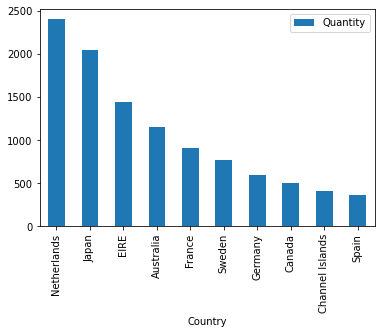

In [7]:
quantity = online_rt[(online_rt['Country'] != 'United Kingdom')]
quantity = quantity.sort_values(by = 'Quantity', ascending = False)
quantity = quantity.drop_duplicates(subset = ['Country'])
quantity = quantity.iloc[:10]
quantity.plot(x = 'Country', y = 'Quantity', kind = 'bar')

# Шаг 5.  Исключите строки с отрицательным Quantity¶

In [8]:
quantity_positive = online_rt[(online_rt['Quantity']>=0)]
quantity_positive

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

          InvoiceDate  UnitPrice  CustomerID         Country  
0        12/1/10 8:26       2.55     17850.0  United Kingdom  
1        12/1/10 8:26       3.39     17850.0  United Kingdom  
2        12/1/10 8:26       2.75     17850.0  United Kingdom  
3        12/1/10 8:26       3.39     17850.0  United Kingdom  
4        12/1/10 8:26       3.39     17850.0  United Kingdom  
...               ...        ...         ...             ...  
541904  12/9/11 12:50       0.85     12680.0          France  
541905  12/9/11 12:50       2.10     12680.0          France  
541906  12/9/11 12:50       4.15     12680.0          France  
541907  12/9/11 12:50       4.15     12680.0          France  
541908  12/9/11 12:50       4.95     12680.0          France  

[531285 rows x 8 columns]

# Шаг 6. Постройте точечный график с соотношением Quantity к  UnitPrice для стран 'Netherlands', 'EIRE', 'Germany'


<AxesSubplot:xlabel='Quantity', ylabel='UnitPrice'>

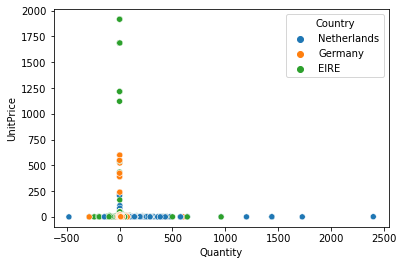

In [9]:
quantity2 = online_rt.loc[online_rt['Country'].isin(['Netherlands','EIRE','Germany'])]
sns.scatterplot(x = 'Quantity',y = 'UnitPrice', data = quantity2, hue='Country')

# Шаг 7. Нарисуйте график, который отображает revenue (y) по отношению к UnitPrice (x)

<AxesSubplot:xlabel='UnitPrice', ylabel='revenue'>

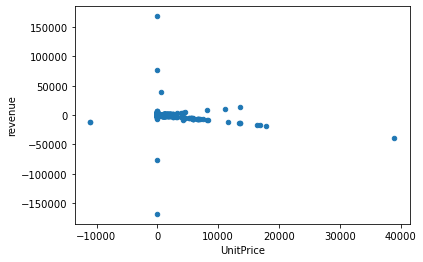

In [12]:
#revenue - англ. доход
online_rt['revenue'] = online_rt['UnitPrice'] * online_rt['Quantity']
online_rt.plot(kind = 'scatter', x = 'UnitPrice', y = 'revenue')